In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_dir = "/data3/lsf/Pein/Power-Prediction/data/"
file_name_common = 'farm_54_withTime'
train_data = pd.read_csv(data_dir + f"train_{file_name_common}.csv")
test_data = pd.read_csv(data_dir + f"test_{file_name_common}.csv")

In [2]:
# Define features and target
features = [
    col for col in train_data.columns if col not in ["time", "lead_hour", "power"]
]
X = train_data[features]
y = train_data["power"]

In [ ]:
# Basic statistics of the dataset
print(train_data[features + ["power"]].describe())

correlation_matrix = train_data[features + ["power"]].corr()
print(correlation_matrix)

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Wind Power")
plt.xlabel("Wind Power")
plt.ylabel("Frequency")
plt.show()

In [9]:
def plot_features(data, features, start_index):
    end_index = start_index + 9
    selected_features = features[start_index:end_index]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    fig.suptitle("Feature Visualizations")

    for idx, feature in enumerate(selected_features):
        print(f"Plotting {feature}...")
        ax = axes[idx // 3, idx % 3]
        x = np.arange(1, len(data) + 1)
        y = data[feature]
        sns.lineplot(x=x, y=y, ax=ax)
        ax.set_title(f"{feature}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Plotting altitude...
Plotting azimuth...
Plotting blh...
Plotting mudlp...
Plotting u100...
Plotting fg10...
Plotting deg0l...
Plotting viwvn...
Plotting kx...


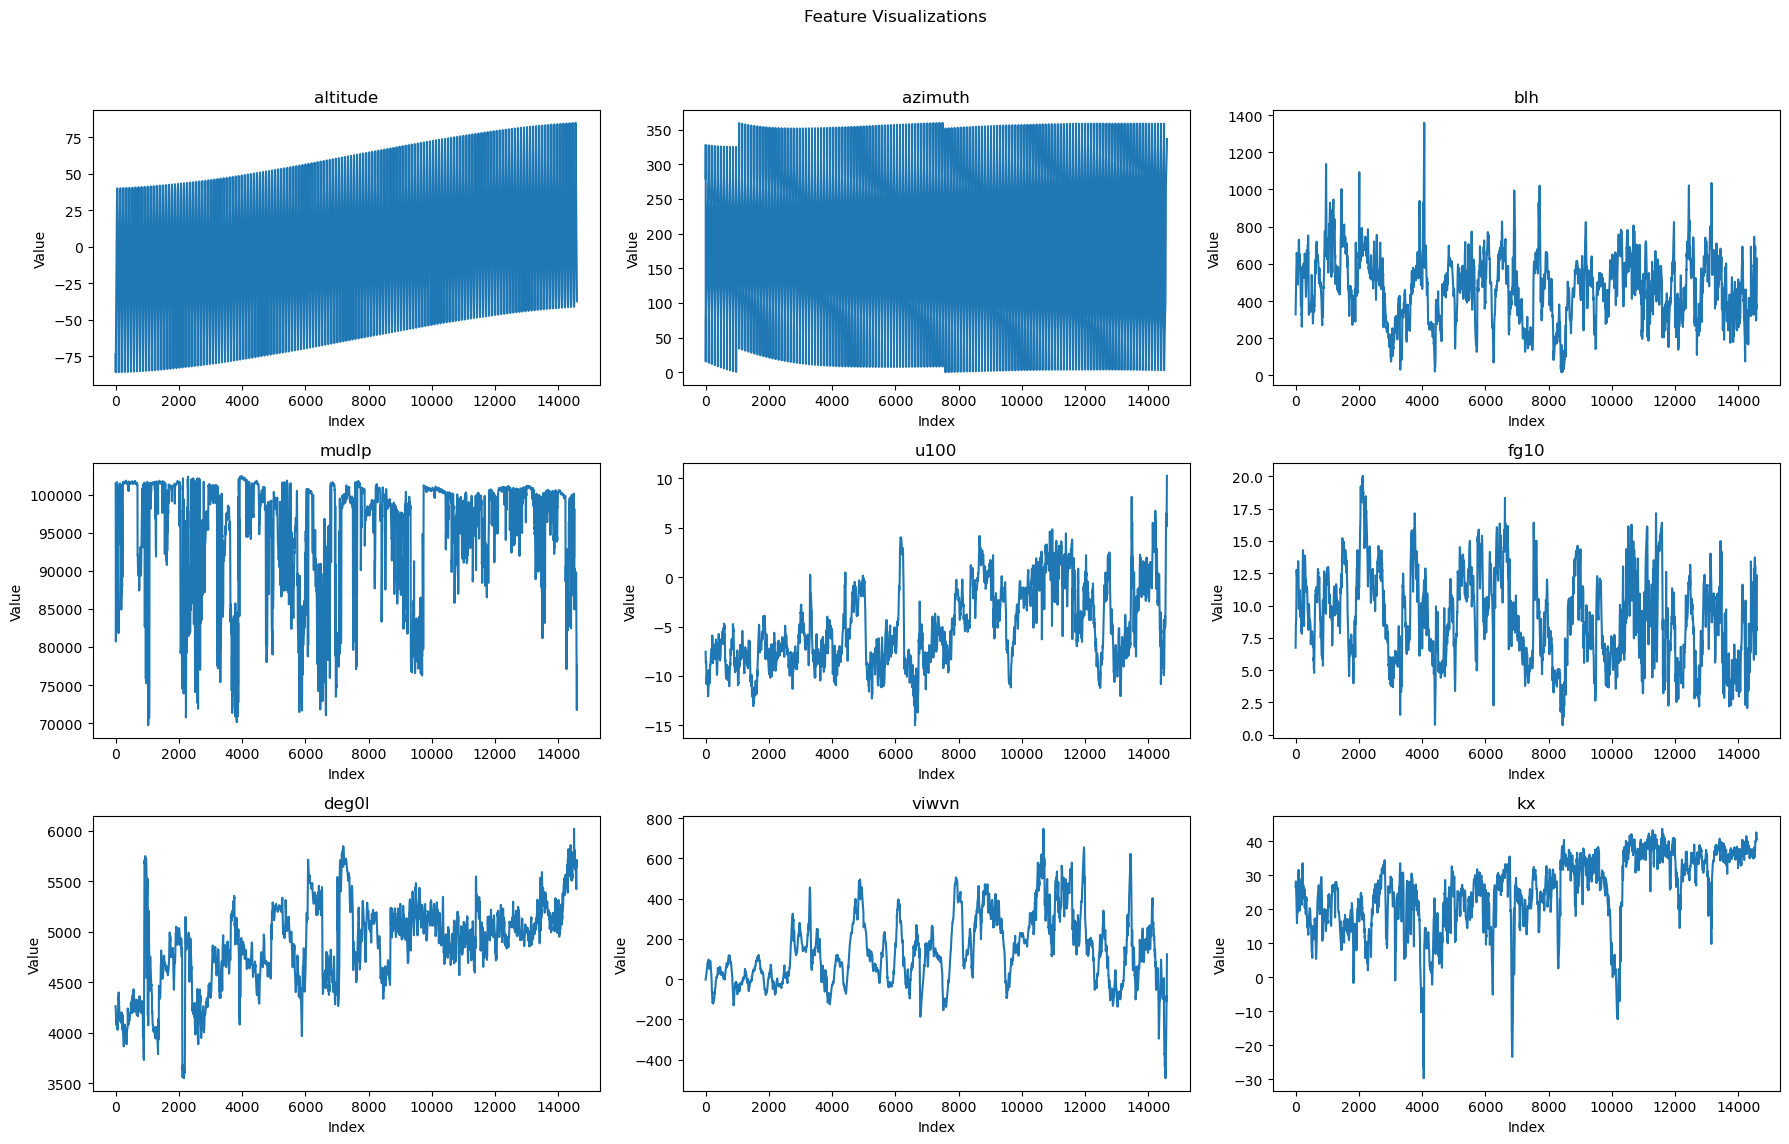

In [10]:
# Define start index
start_index = 3

# Call the function to plot features
plot_features(train_data[features + ["power"]], features + ["power"], start_index)

In [11]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Set the threshold for correlation
threshold = 0.8

# Identify groups of features with high correlation
groups = {}
for i in range(len(corr_matrix.columns)):
    feature = corr_matrix.columns[i]
    if feature not in groups:
        groups[feature] = set()
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_feature = corr_matrix.columns[j]
            print(f"{feature} and {correlated_feature} are highly correlated with value {corr_matrix.iloc[i, j]}")
            if correlated_feature in groups:
                groups[correlated_feature].add(feature)
                groups[feature] = groups[correlated_feature]
            else:
                groups[feature].add(correlated_feature)
                groups[correlated_feature] = groups[feature]

# Ensure each independent feature is its own group
for feature in corr_matrix.columns:
    if all([feature not in group for group in groups.values()]):
        groups[feature] = {feature}

# Print the groups
for group in groups.values():
    print(group)
    

ws200 and fg10 are highly correlated with value 0.8744055250391526
viwve and u100 are highly correlated with value 0.8098364902149452
cape and capes are highly correlated with value 0.8066370774486115
v100 and viwvn are highly correlated with value 0.8239127808754658
nsss and ewss are highly correlated with value 0.8518484755894764
fdir and dsrp are highly correlated with value 0.9601218375358865
par and altitude are highly correlated with value 0.8164618185192026
par and dsrp are highly correlated with value 0.9068659668180118
par and fdir are highly correlated with value 0.9432778031281056
hwbt0 and hwbt1 are highly correlated with value 0.9908244196216981
sshf and ishf are highly correlated with value 0.9979106709080964
d2m and mld are highly correlated with value 0.8478418432129942
hour_cos and altitude are highly correlated with value 0.9448534609929057
hour_cos and par are highly correlated with value 0.8125771082701367
{'lgws'}
{'mgws'}
{'trpp'}
{'altitude'}
{'azimuth'}
{'blh'}
